In [ ]:
# Start with importing necessary libraries

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Loading and Exploring the Data

The digits dataset contains images of handwritten digits, represented as 8x8 matrices. Each pixel is a value between 0 (white) and 16 (black), indicating the grayscale value.

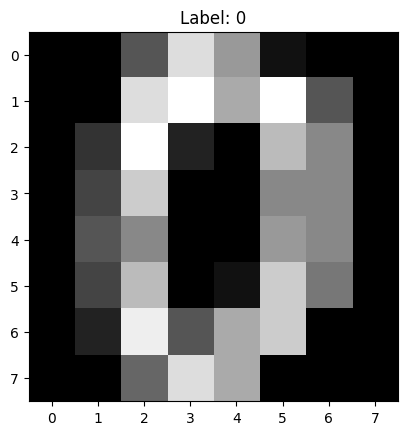

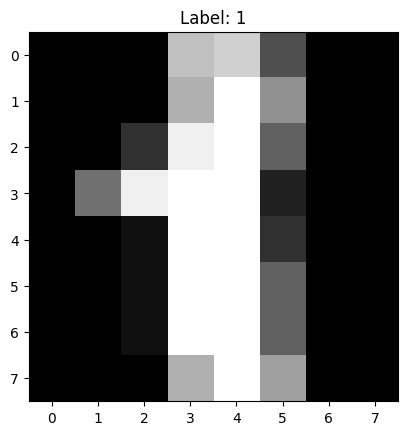

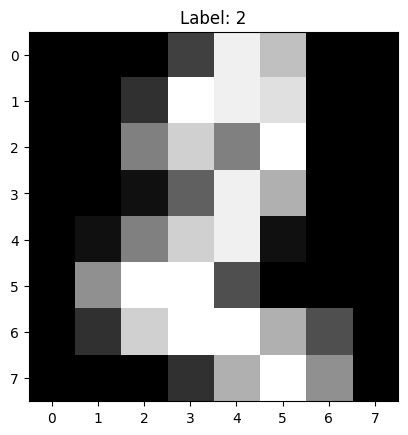

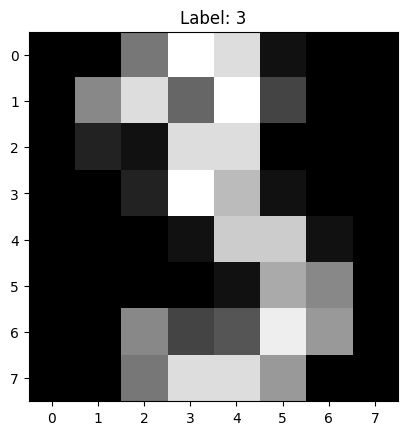

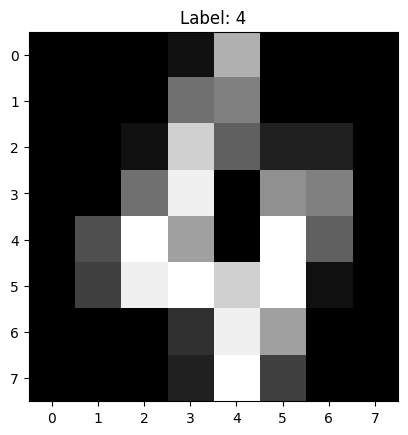

In [ ]:
# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Visualize the first few images from the dataset
for i in range(5):
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.show()


# Preparing the Data

We split the data into a training set and a testing set.

We use the training set to train models and the test set to evaluate them.

In [ ]:
# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

### Logistic Regression

Logistic Regression can be applied to multiclass problems. For the digits dataset, it tries to find linear boundaries between the pixel values of different digits.



In [ ]:
# Training a Logistic Regression model
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

# Predict and evaluate
lr_predictions = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

Logistic Regression Accuracy: 0.9722


### Decision Trees

Decision Trees make decisions based on pixel values, effectively asking questions like "Is the pixel at position (4,4) darker than a certain threshold?" to classify the digits.



In [ ]:
# Train a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict and evaluate
dt_predictions = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

Decision Tree Accuracy: 0.8417


### Random Forest

Random Forests use an ensemble of decision trees. Each tree is trained on a random subset of the data and makes its own predictions. The Random Forest algorithm then aggregates these predictions to produce a final result

In [ ]:
# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.9722


# Model Comparison and Conclusion

To determine the best model, we compare the accuracy of each. The model with the highest accuracy on the test dataset is considered the best for this specific dataset and split.

In [ ]:
# Compare the models
accuracies = {
    "Logistic Regression": lr_accuracy,
    "Decision Tree": dt_accuracy,
    "Random Forest": rf_accuracy
}

best_model = max(accuracies, key=accuracies.get)

print(f"The best model is {best_model} with an accuracy of {accuracies[best_model]:.4f}.")

The best model is Logistic Regression with an accuracy of 0.9722.


# Using K-NNs, GBA, SVM with hyper parameter tuning

### Import Necessary Libraries



In [ ]:
# Import necessary libraries
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


### Data Splitting

The Iris dataset is loaded. This dataset has features of iris flowers and their respective species. We then split the dataset into training and testing sets. 80% of the data is used for training, and 20% is used for testing.

In [ ]:
# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SVM with Hyperparameter Tuning

We're setting up the Support Vector Machine (SVM) classifier and defining potential hyperparameters to tune. Using GridSearchCV, we search for the best hyperparameters from the defined set. After finding the best parameters, we test the SVM's accuracy on the test set.

In [ ]:
# Define hyperparameters for SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 'scale', 'auto']
}

# Use GridSearchCV for hyperparameter tuning
svm = SVC()
svm_search = GridSearchCV(svm, svm_params, cv=5)
svm_search.fit(X_train, y_train)
svm_best = svm_search.best_estimator_
svm_predictions = svm_best.predict(X_test)

# Print results
print(f"SVM Accuracy: {accuracy_score(y_test, svm_predictions)}")
print(f"Best SVM Params: {svm_search.best_params_}")

SVM Accuracy: 1.0
Best SVM Params: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}


### KNN with Hyperparameter Tuning

This section follows the same pattern but for the K-Nearest Neighbors (KNN) algorithm. We set up the hyperparameters, use GridSearchCV for tuning, and then test and display the accuracy

In [ ]:
# Define hyperparameters for KNN
knn_params = {
    'n_neighbors': np.arange(1, 11),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Use GridSearchCV for hyperparameter tuning
knn = KNeighborsClassifier()
knn_search = GridSearchCV(knn, knn_params, cv=5)
knn_search.fit(X_train, y_train)
knn_best = knn_search.best_estimator_
knn_predictions = knn_best.predict(X_test)

# Print results
print(f"KNN Accuracy: {accuracy_score(y_test, knn_predictions)}")
print(f"Best KNN Params: {knn_search.best_params_}")

KNN Accuracy: 1.0
Best KNN Params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


### Gradient Boosting with Hyperparameter Tuning

Finally, we set up Gradient Boosting in a similar fashion, defining hyperparameters, tuning them using GridSearchCV, and then testing and displaying the results.

In [ ]:
# Define hyperparameters for Gradient Boosting
gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

# Use GridSearchCV for hyperparameter tuning
gb = GradientBoostingClassifier()
gb_search = GridSearchCV(gb, gb_params, cv=5)
gb_search.fit(X_train, y_train)
gb_best = gb_search.best_estimator_
gb_predictions = gb_best.predict(X_test)

# Print results
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gb_predictions)}")
print(f"Best Gradient Boosting Params: {gb_search.best_params_}")

Gradient Boosting Accuracy: 1.0
Best Gradient Boosting Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
